
# Week 9 Neural Networks
Proprietary material - Under Creative Commons 4.0 licence CC-BY-NC https://creativecommons.org/licenses/by-nc/4.0/legalcode

# Tutorial Overview
Hi everyone! Welcome to the week 9 Lab - Neural Networks!

Here's an outline of the lab:

     1) Neural Networks applied to housing price prediction (regression)

     2) Neural Networks applied to spam email dataset (classification)




**Tips to get the most out of this tutorial:**
1. Make sure you carefully read and understand how the example code works.  
2. Try your best before looking at the hidden solutions








Before we begin, let's quickly cover a nice trick for optimization on Google Colab. We can choose to run our processes on GPUs specifically, which are in general much faster at matrix computations, which are one of the primary computations used for Neural Nets (and many other ML models).

To run on a GPU, simply click on 'Runtime' in the menu bar, then 'Change runtime process':

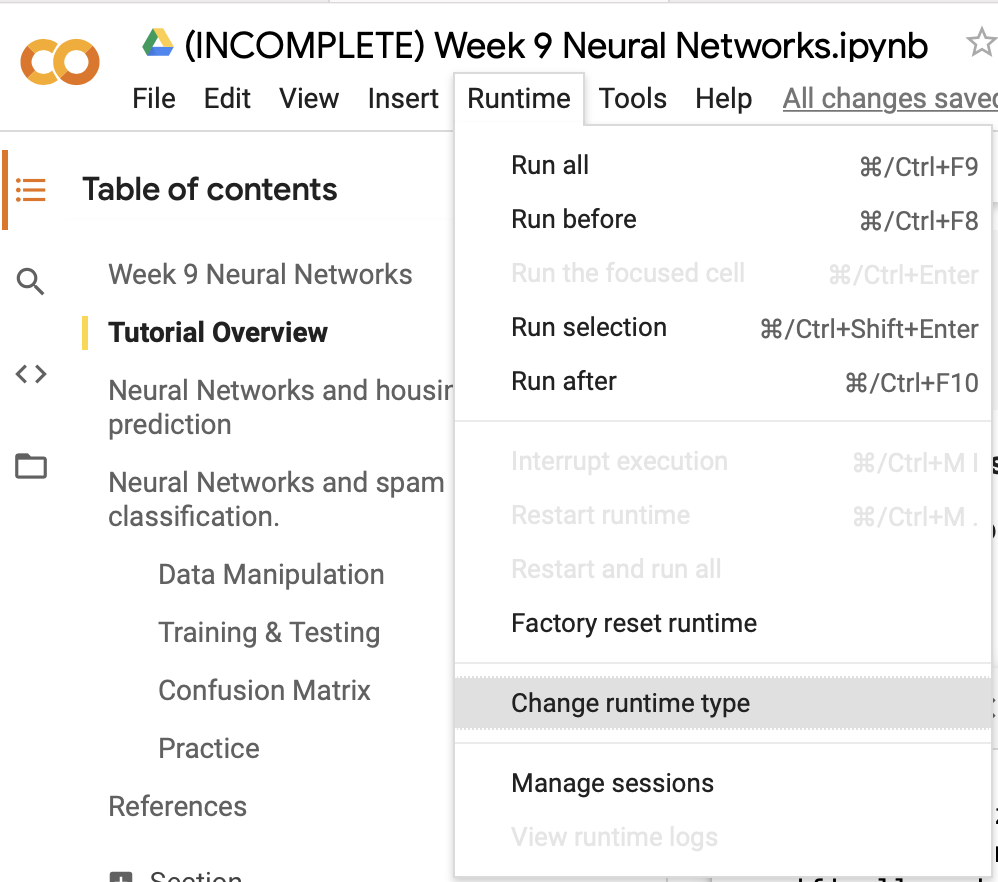



From there, select GPU from the dropdown menu:


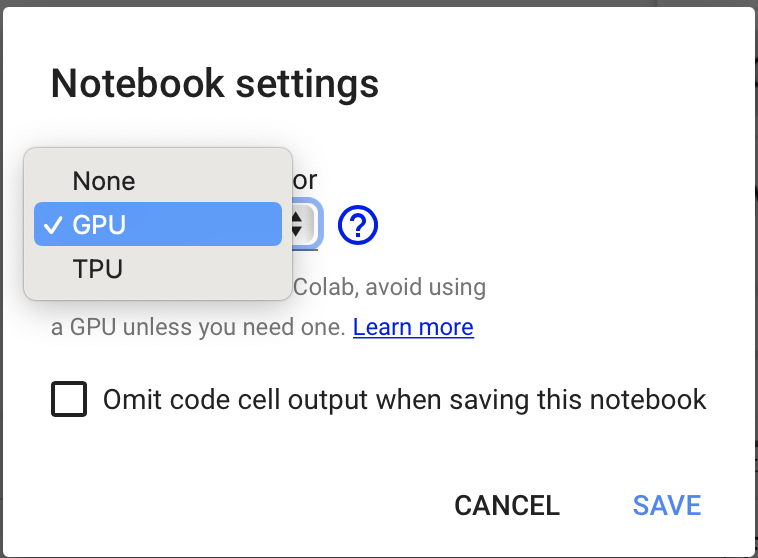

Once you get to the later part of the lab, try switching back to the None option to see what the hit in performance looks like!

# Neural Networks and housing price prediction

We'll use Keras for this.

Keras is a library built on top of Tensorflow, with which you can build and train neural networks.

In [ ]:
from tensorflow import keras

Next, we'll need to create the neural network model. Keras provides many simple way to create layers and change the parameters in your model. The simplest of which would be its sequential model.
```
from keras.models import Sequential
model = Sequential()
```
Next, we need layers in the model. The most commonly used layer is *Dense*, which is just short-form for a fully-connected layer, where all inputs of the previous layer share perceptrons with the following. The number parameter in *Dense* is the number of units in the layer. The first layer should specify the number of features (inputs) being used. We're going to be creating a neural network to do regression on the price of a house given its features, so we'll want the output layer to have a single output (cost).
```
from keras.layers import Dense
# Input layer
model.add(Dense(12, input_dim=8))

# Intermediate layer
model.add(Dense(20))

# Output layer
model.add(Dense(1))
```

The first thing we need is data. For this we'll use an online house pricing CSV.

The goal here is to take the features of a house such as frontage, area, etc., and predict the house price using a neural network!

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Learn more about the data:
# https://www.kaggle.com/alphaepsilon/housing-prices-dataset/data
# https://www.kaggle.com/apapiu/regularized-linear-models/notebook

df_original = pd.read_csv("https://8f6d2fcd-040e-4178-9dc7-915c7336186b.usrfiles.com/ugd/8f6d2f_34e52fa53c884daf816bf36a3a7f81a8.csv")
df_original.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Now it's time for everyone's favourite part: Data manipulation! Yes, you'll actually need what we taught you! Your goal here is to remove any non-numerical data, or even data that is difficult to interpret numerically.

Note: If you are unsure of how to do some operation such as removing text columns, search this online! It's an important skill to develop.

In [ ]:
# TO-DO: Clean the data!
# Create a copy so you don't have to reload the data each time it's changed
df = df_original.copy()

# Remove text columns

# Remove ID column (It is numeric, but has no bearing on house price)

# Drop any rows with NAN values

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#@title
# TO-DO: Clean the data!
# Create a copy so you don't have to reload the data each time it's changed
df = df_original.copy()

# Remove text columns
numeric_features = df_original.dtypes[df_original.dtypes != "object"].index
df = df_original[numeric_features]

# Remove ID column (It is numeric, but has no bearing on house price)
df.drop('Id', axis=1, inplace=True)

# Drop any rows with NAN values
df.dropna(inplace=True)

df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


We need to separate the inputs from the output, which is what we're trying to predict. It would be pretty easy for a neural network to guess the output if it was one of the inputs!

In [ ]:
x = df.drop('SalePrice', 1).values
y = df['SalePrice'].values.reshape(-1, 1)

Ensure that none of the values are NAN

In [ ]:
np.isnan(x).any()

False

In [ ]:
np.isnan(y).any()

False

Scale the data using sklearn's StandardScaler, which sets mean of a feature to 0 and it's variance to 1.

This makes features easier to interpret to a neural network, and also ensures no feature has greater bearing over another. For example, OverallCond ranges from 1-10, whereas other features like LotArea ranges in the thousands, so without standardizing, OverallCond could be 'drowned out' by such large values in these other features.

In [ ]:
#TODO: Use StandardScaler to scale the inputs and outputs
from sklearn.preprocessing import StandardScaler
# Scale x & y
scaler_x = StandardScaler()

scaler_y = StandardScaler()


In [ ]:
#@title Solution
from sklearn.preprocessing import StandardScaler
# Scale x & y
scaler_x = StandardScaler()
scaler_x.fit(x)
x = scaler_x.transform(x)

scaler_y = StandardScaler()
scaler_y.fit(y)
y = scaler_y.transform(y)

Split the data into the training and validation sets

In [ ]:
#TODO: Split the dataset into training and testing (with a test size of 33%)



In [ ]:
#@title Solution
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=True)

Next, we need to create a model. Below is a very simple model that you can train and see its performance.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Design model
model = Sequential()
model.add(Dense(100, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
epochs = 60
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/60
24/24 [==============================] - 3s 17ms/step - loss: 0.9576 - val_loss: 0.2948
Epoch 2/60
24/24 [==============================] - 0s 3ms/step - loss: 0.2475 - val_loss: 0.3194
Epoch 3/60
24/24 [==============================] - 0s 3ms/step - loss: 0.1563 - val_loss: 0.3537
Epoch 4/60
24/24 [==============================] - 0s 3ms/step - loss: 0.1302 - val_loss: 0.3663
Epoch 5/60
24/24 [==============================] - 0s 3ms/step - loss: 0.1180 - val_loss: 0.3314
Epoch 6/60
24/24 [==============================] - 0s 3ms/step - loss: 0.1052 - val_loss: 0.3559
Epoch 7/60
24/24 [==============================] - 0s 3ms/step - loss: 0.1956 - val_loss: 0.3827
Epoch 8/60
24/24 [==============================] - 0s 3ms/step - loss: 0.1161 - val_loss: 0.4475
Epoch 9/60
24/24 [==============================] - 0s 3ms/step - loss: 0.0762 - val_loss: 0.3665
Epoch 10/60
24/24 [==============================] - 0s 4ms/step - loss: 0.0639 - val_loss: 0.4136
Epoch 11/60
24/24 

An important aspect of training neural networks is considering the training and validation (or test) loss. The best way to see these are to plot them using Matplotlib. For reasons we'll explain later, try to minimize the test error. Ideally, the train and testing error should be as close to each other as possible, and as small as possible.

There is a problem with the above network. By using the plot below, diagnose the issue!

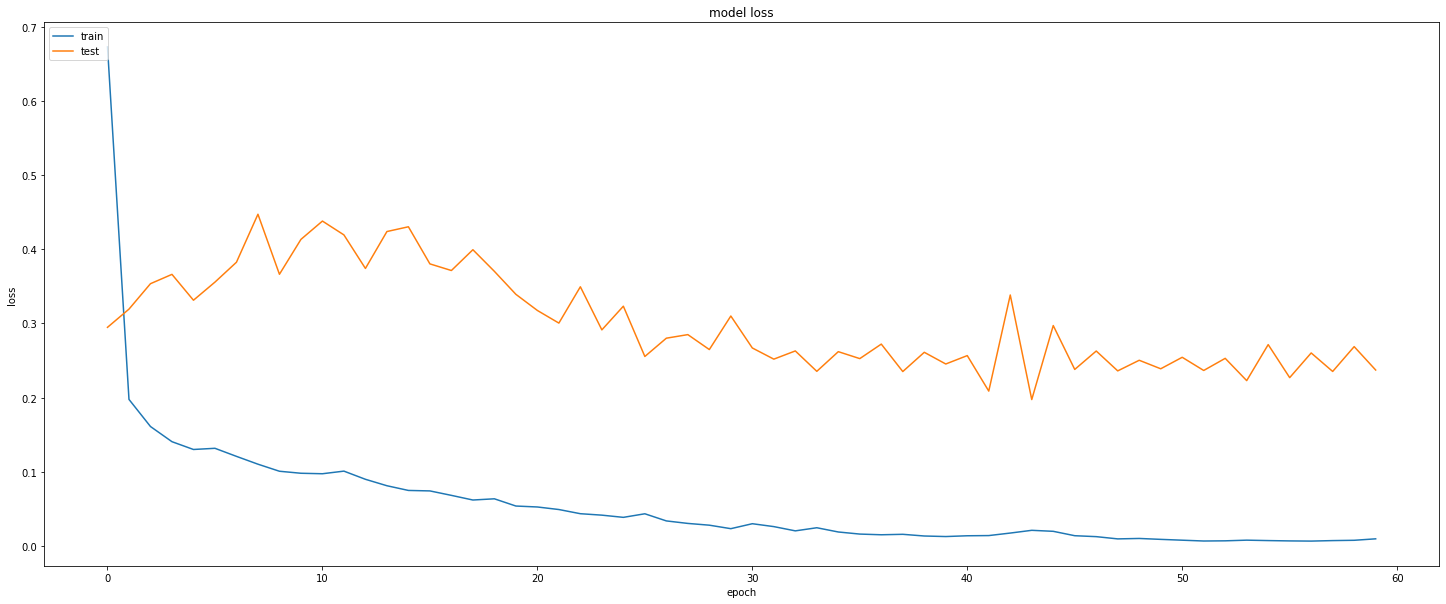

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Now that we have a model trained, we can use it to predict our test dataset and compare to the actual! This demonstrates how well it would perform if we were to deploy the network and use it to predict unseen, unlabelled data (except this data is labelled, so we assess the quality of the prediction).

In [ ]:
# Predict the test set and invert the scaling on each
y_pred = model.predict(x_test)
inversed_y_pred = scaler_y.inverse_transform(y_pred)
inversed_y = scaler_y.inverse_transform(y_test)

# Show average price difference between predicted and actual
average_difference = inversed_y_pred-inversed_y
average_difference = sum([abs(d[0]) for d in average_difference])/len(average_difference)
print("Average difference between actual & prediction is {0}".format(int(average_difference)))

# Show some differences in price between predicted and actual
for i in range(10):
  print('Predicted {0}, actual is {1}'.format(int(inversed_y_pred[i][0]), int(inversed_y[i][0])))


Average difference between actual & prediction is 19610
Predicted 184604, actual is 200000
Predicted 123126, actual is 143000
Predicted 134067, actual is 148000
Predicted 196172, actual is 250580
Predicted 219166, actual is 210000
Predicted 306206, actual is 278000
Predicted 120883, actual is 143000
Predicted 270442, actual is 255000
Predicted 272583, actual is 303477
Predicted 202908, actual is 212900


Now it's your turn to experiment! Mess with the parameters and see if you can build a model which performs better than the above! (Try to bring loss and average actual/prediction difference down!). You do that mainly by changing the number of nodes in the first two Dense layers, and by changing the number of epochs, but if you're feeling adventurous you can learn about what Dropout layers do online and try to utilize them! (Don't stress though, we'll cover them in more detail later anyway)

In [ ]:
# TO-DO: Edit this model and improve the training & testing error
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Design model
model = Sequential()
model.add(Dense(100, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
epochs = 60
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

In [ ]:
#TODO: Use matplotlib to plot the test and train loss over epochs



In [ ]:
#@title Solution
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#TODO: Use matplotlib to plot the test/train accuracy over epochs


In [ ]:
#@title Solution
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)

# Summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Predict the test set and invert the scaling on each
y_pred = model.predict(x_test)
inversed_y_pred = scaler_y.inverse_transform(y_pred)
inversed_y = scaler_y.inverse_transform(y_test)

# Show average price difference between predicted and actual
average_difference = inversed_y_pred-inversed_y
average_difference = sum([abs(d[0]) for d in average_difference])/len(average_difference)
print("Average difference between actual & prediction is {0}".format(int(average_difference)))

# Show some differences in price between predicted and actual
for i in range(10):
  print('Predicted {0}, actual is {1}'.format(int(inversed_y_pred[i][0]), int(inversed_y[i][0])))


# Neural Networks and spam email classification.

No one likes spam! That is why this lesson will be focused on classifying article titles as legitimate (real) or as spam (fake).

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
import os

## Data Manipulation

First we load the data.

In [ ]:
from urllib import request

data = request.urlopen('https://8f6d2fcd-040e-4178-9dc7-915c7336186b.usrfiles.com/ugd/8f6d2f_bd380dc659a8435da14304f221298114.txt')
fake = data.read().decode('utf-8').split('\n')

data = request.urlopen('https://8f6d2fcd-040e-4178-9dc7-915c7336186b.usrfiles.com/ugd/8f6d2f_8859880dfaf44f5c837f2e2c7b485b6e.txt')
real = data.read().decode('utf-8').split('\n')

print (f'Num Real: {len(real)} | Num Fake: {len(fake)} | Total: {len(real) + len(fake)}')

Now we can check out a few random real and fake titles!

In [ ]:
import random as r

print('Real:')
for i in range(5): print(f'    - {real[r.randint(0, len(real)-1)]}')

print('Fake:')
for i in range(5): print(f'    - {fake[r.randint(0, len(fake)-1)]}')

This data is text, and so to be useful, we must find a way to represent it numerically. Sklearn's CountVectorizer is perfect for this purpose: It creates a list of all the words in all the emails and then counts the number of each word in each email. These counts are the inputs (features) to the network.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Count the number of each word in each title
vectorizer = CountVectorizer()
data = vectorizer.fit_transform(fake + real).toarray()
print(data.shape)

# 0 = fake,  1 = real
# Create labels array
labels = np.zeros(len(fake) + len(real))

# Make real article labels 1
labels[len(fake):] = 1

TODO - As always, we must shuffle and split the emails into training and validation data (80% training, 20% validation).

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
# TODO
# Shuffle the training data and labels
#X, y =  

# Split the data into training and validation data
# x_train, x_val, y_train, y_val = 

In [ ]:
#@title
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X, y = shuffle(data, labels)
x_train, x_val, y_train, y_val = train_test_split(X, y, train_size=0.8)

## Training & Testing

First, we build and compile the model.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import backend as K

# CONSTANTS
NUM_FEATURES = X.shape[1]

# HYPERPARAMETERS
BATCH_SIZE = 10
EPOCHS = 25

# Model making
model = Sequential()

model.add(Dense(4, activation='relu', input_dim=NUM_FEATURES))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Now, we train the model.

In [ ]:
history = model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(x_val, y_val))

score = model.evaluate(x_val, y_val, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Plot loss across epochs:

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plot accuracy across epochs:

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)

# Summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As a general note, while validation accuracy is really what you're trying to maximize, it's usually loss that tells you 'what is going on' with your model (e.g. overfitting, underfitting, needs more training, or is performing well!)

## Confusion Matrix

This is a confusion matrix of the true positives, false positives, true negatives, and false negatives.

True denotes a correct prediction and false an incorrect prediction.

Positive denotes an email being legitimate, and false a spam email.

This helps you understand how your model may be failing you. For some purposes, such as this, it's very useful to know whether the model is getting more false positives or false negatives. For example, here a false positive (an email which isn't spam but is marked as such) is very harmful since the user may not see that email if put in the junk folder! Whereas if a few spam email make it through this filter (false negatives), it isn't the end of the world.

In [ ]:
# Get predicted outputs for validation data
y_pred = model.predict(x_val)

# Check whether the prediction is correct
correct = np.array([int(i[0]) for i in np.round(y_pred)]) == y_val

# Calculate true positives, true negatives, false positives, and false negatives
true_positive = len([i for count, i in enumerate(correct) if i == 1 and y_val[count] == 0])
true_negative = len([i for count, i in enumerate(correct) if i == 1 and y_val[count] == 0])
false_positive = len([i for count, i in enumerate(correct) if i == 0 and y_val[count] == 1])
false_negative = len([i for count, i in enumerate(correct) if i == 0 and y_val[count] == 0])

cell_text = [['True Positive: ' + str(true_positive), 'False Negative: ' + str(false_negative)],
             ['False Positive: ' + str(false_positive), 'True Negative: ' + str(true_negative)]]


columns = ('Predicted: Positive (Real)', 'Predicted: Negative (Fake)')
rows = ['Actual: Positive (Real)', 'Actual: Negative (Fake)']
fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='top')
table.set_fontsize(40)
table.scale(4, 4)

## Practice
Below is our code to build and compile the model. There are three types of changes you should try out to see if you can achieve higher than 85%. Be sure to evaluate the model after each change to see how it affects the performance!

1. Play with the number of nodes in the Dense layers

2. Play with the number of epochs

3. Add Dropout layers anywhere after the first Dense layer (Note that you never have two sequential Dropout layers). The values are generally between 0.1 and 0.8, so do some experimentation! E.g.
```
model.add(Dropout(0.4))
```
4. Try adding and removing Dense layers to the model (note that more layers does not equal better performance).

Check/plot the loss & accuracy between each of these steps to see whether the model is improving or not. It's smart to record your changes and the result such that you don't forget and have to test the same model again. This is the exact process you'll need to follow during the project phase!

In [ ]:
model = Sequential()

model.add(Dense(4, activation='relu', input_dim=NUM_FEATURES))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# No need to edit code below this line
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(x_val, y_val))

score = model.evaluate(x_val, y_val, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)

# Summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#References

Lab developed for the LearnAI 2020-2021 academic year cohort (University of Toronto AI Club)